### Regression

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
df.rename({"medv":"Price"},axis=1,inplace=True)

In [7]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

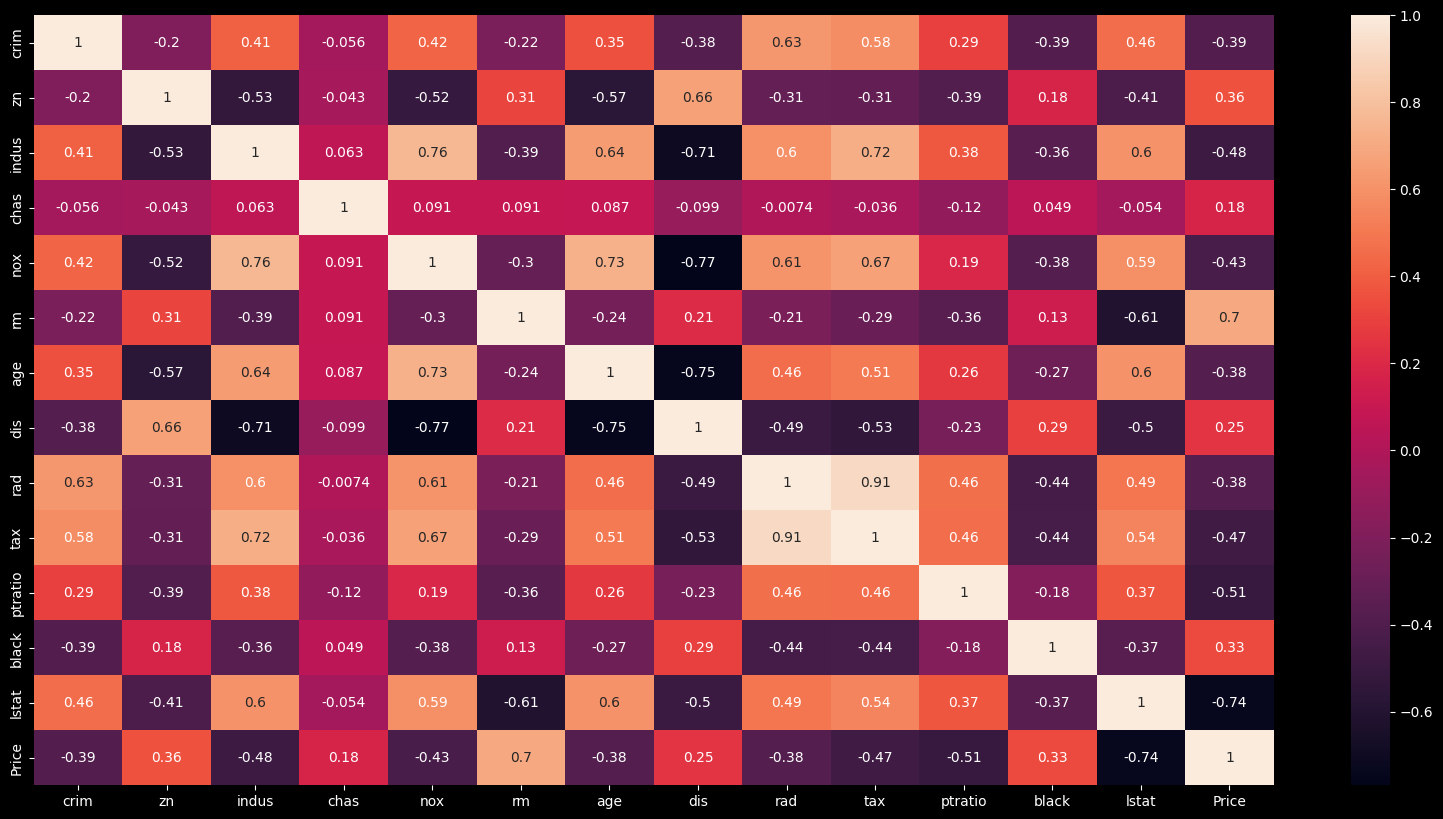

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Train Test Split 

In [12]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [13]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [14]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

Model Training

In [16]:
knn_reg=KNeighborsRegressor(n_neighbors=5,p=1)
knn_reg.fit(x_train,y_train)


KNeighborsRegressor(p=1)

Evalaution 

In [17]:
y_pred_testing= knn_reg.predict(x_test)
y_pred_testing[:5]


array([24.5 , 30.26, 13.46, 28.  , 17.16])

In [18]:
y_test[:5]

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: Price, dtype: float64

Testing Data Evaluation 

In [19]:
mse = mean_squared_error(y_test,y_pred_testing)
print("Mean squared error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("*"*80)
mae = mean_absolute_error(y_test,y_pred_testing)
print("Mean absolute error:",mae)
print("*"*80)
r_squared=r2_score(y_test,y_pred_testing)
print("R2 Score is :",r_squared)

Mean squared error: 22.02435294117647
********************************************************************************
Root Mean Squared Error: 4.693011074052188
********************************************************************************
Mean absolute error: 3.3298039215686273
********************************************************************************
R2 Score is : 0.6996697566655379


Training Data Evaluation

In [20]:
y_pred_train=knn_reg.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error:",mae)
print("*"*80)
r_squared=r2_score(y_train,y_pred_train)
print("R2 SCore is :",r_squared)

Mean Squared Error: 23.512329702970295
********************************************************************************
Root Mean Squared Error: 4.8489514024137526
********************************************************************************
Mean Absolute Error: 3.2943069306930695
********************************************************************************
R2 SCore is : 0.729349505538192


In [21]:
k_values = range(2,21)
list(k_values)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Text(0.5, 1.0, 'Comaprison of R2 Score of Training and Testing Data')

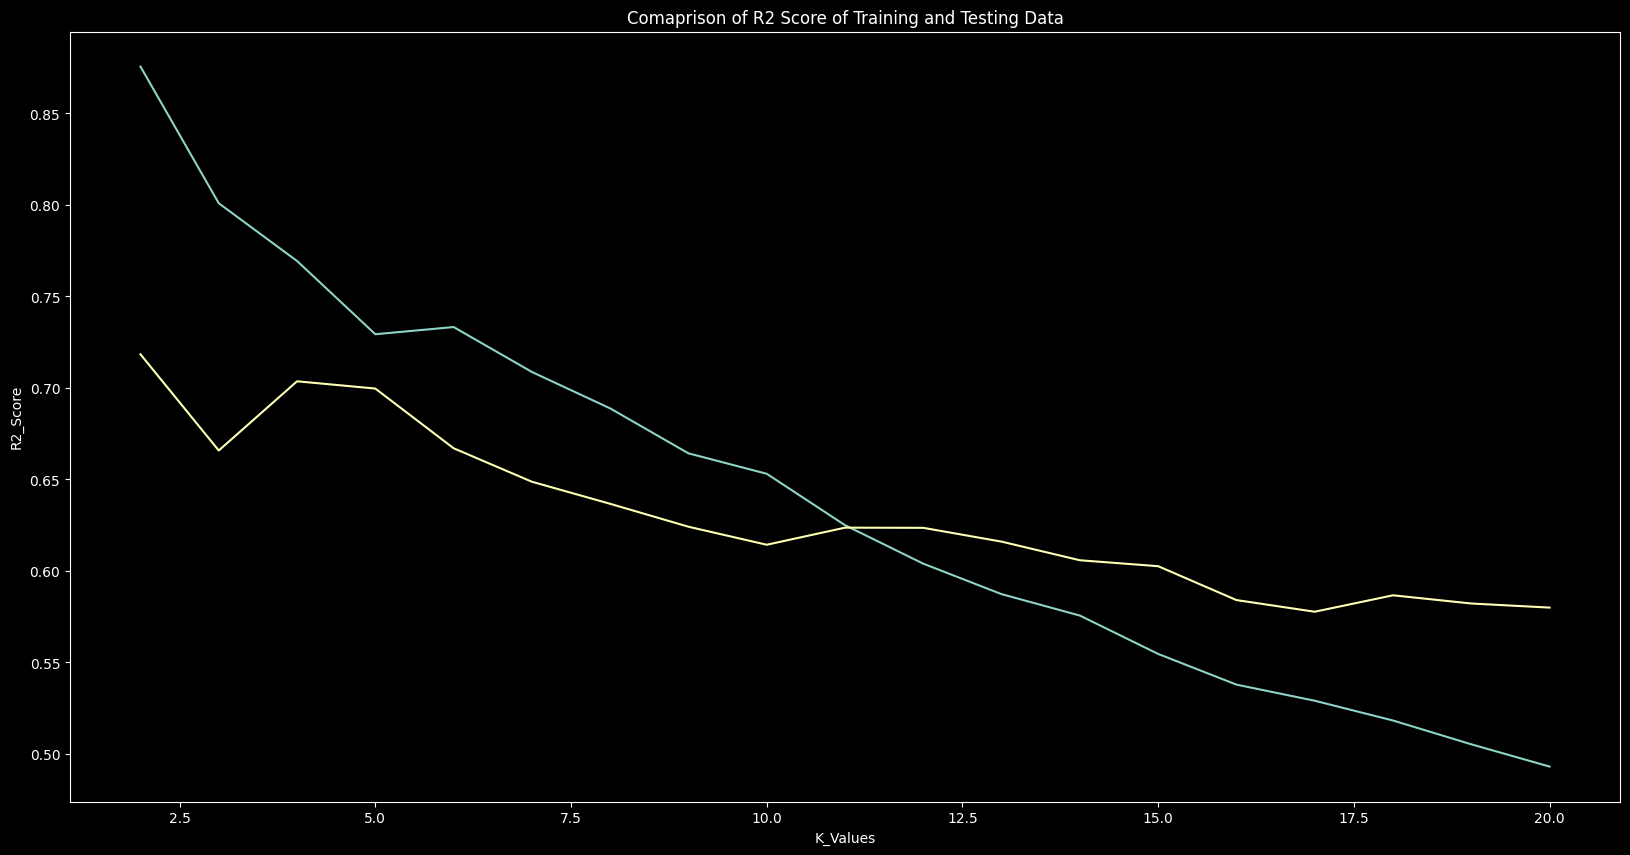

In [22]:
r2_train_list_p1 = []
r2_testing_list_p1 = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_training = knn_reg.score(x_train,y_train)
    r2_train_list_p1.append(r2_training)

    r2_testing = knn_reg.score(x_test,y_test)
    r2_testing_list_p1.append(r2_testing)


plt.figure(figsize=(20,10))

plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)

plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comaprison of R2 Score of Training and Testing Data")


For p=2

Text(0.5, 1.0, 'Comaprison of R2 Score of Training and Testing Data')

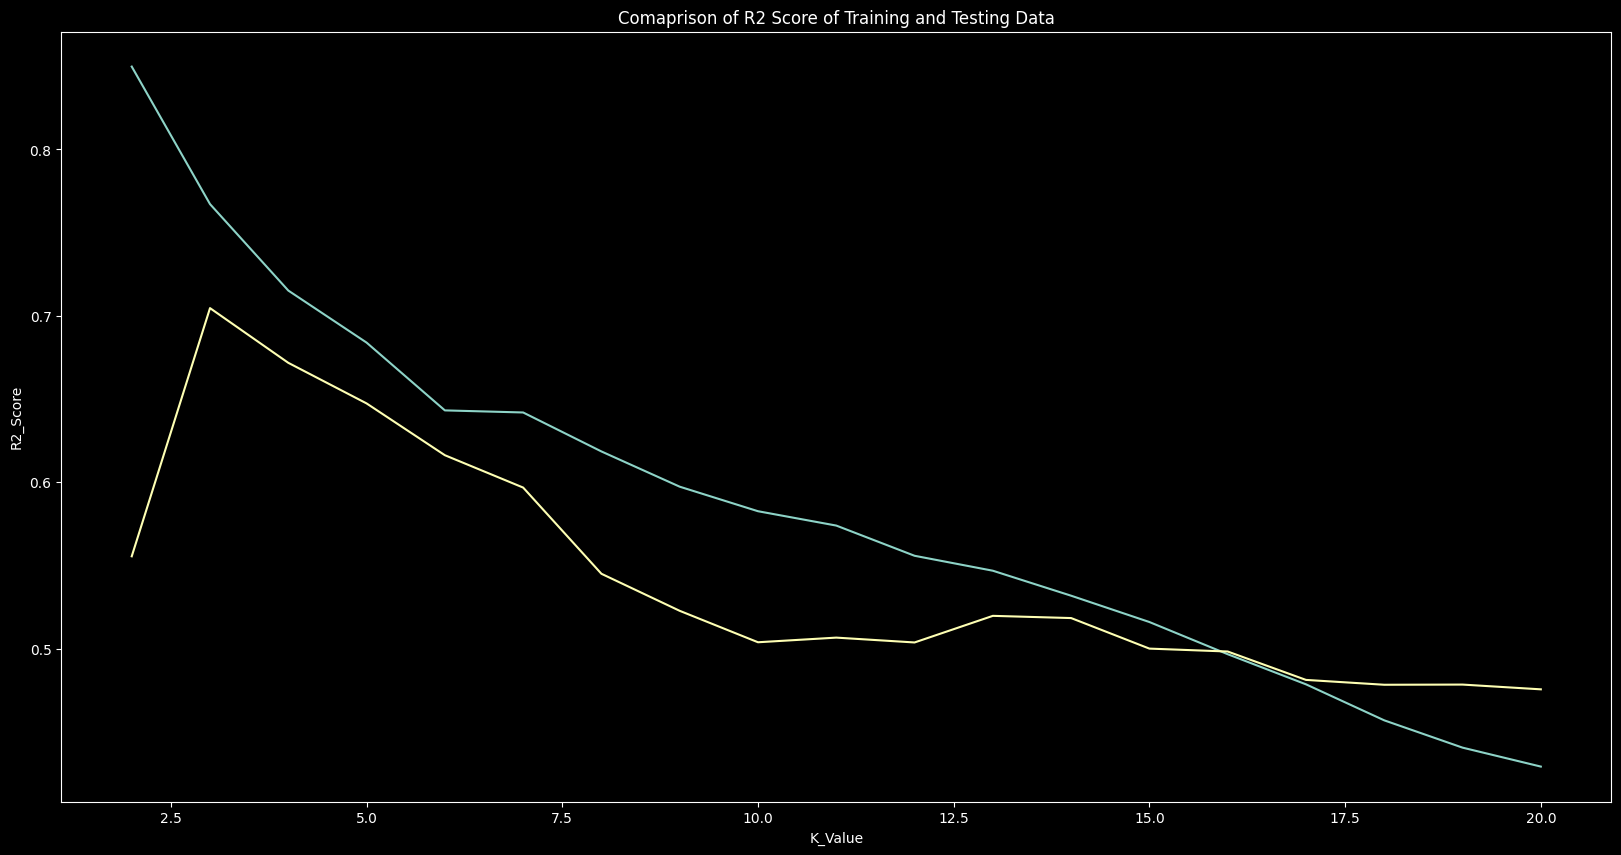

In [23]:
r2_train_list_p2 = []
r2_testing_list_p2 = []

for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    r2_training=knn_reg.score(x_train,y_train)
    r2_train_list_p2.append(r2_training)

    r2_testing=knn_reg.score(x_test,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("K_Value")
plt.ylabel("R2_Score")
plt.title("Comaprison of R2 Score of Training and Testing Data")


Normalization

In [24]:
normal_scaling = MinMaxScaler()
normal_scaling.fit(x_train)
normal_train_df=pd.DataFrame(normal_scaling.fit_transform(x_train),columns=x_train.columns)
normal_train_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322
3,0.079146,0.00,0.642963,0.0,0.471193,0.455562,0.846550,0.081132,1.000000,0.914122,0.808511,0.005547,0.594923
4,0.008056,0.00,0.274074,0.0,0.314815,0.379093,0.685891,0.242514,0.130435,0.229008,0.893617,0.984997,0.263521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.001822,0.00,0.289630,0.0,0.277778,0.401261,0.916581,0.098337,0.173913,0.375954,0.882979,0.996898,0.467163
400,0.003261,0.20,0.230370,0.0,0.162551,0.405328,0.403708,0.300030,0.086957,0.068702,0.638298,0.979197,0.310982
401,0.000067,0.80,0.047037,0.0,0.102881,0.563758,0.276004,0.656039,0.130435,0.177481,0.468085,0.984972,0.117550
402,0.125342,0.00,0.642963,0.0,0.730453,0.562538,0.944387,0.090489,1.000000,0.914122,0.808511,0.276186,0.594371


Without Hyperparameter tuning

In [25]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(normal_train_df,y_train)


KNeighborsRegressor()

Evaluation on Training Data

In [26]:
y_pred_train=knn_reg.predict(normal_train_df)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error: ",mae)
print("*"*80)
r_squared=r2_score(y_train,y_pred_train)
print("R2 Score Is : ",r_squared)

Mean Squared Error:  13.918433663366336
********************************************************************************
Root Mean Squared Error:  3.730741704187833
********************************************************************************
Mean Absolute Error:  2.421188118811881
********************************************************************************
R2 Score Is :  0.8397848702909227


Normalizing Testing Data 

In [28]:
array = normal_scaling.transform(x_test)
normal_testing_df=pd.DataFrame(array,columns=x_test.columns)
normal_testing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000930,0.0,0.122593,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711
1,0.000533,0.4,0.210000,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
2,0.001087,0.0,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
3,0.000928,0.0,0.372963,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
4,0.057112,0.0,0.642963,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.211336,0.0,0.642963,0.0,0.436214,0.155583,1.000000,0.038584,1.000000,0.914122,0.808511,0.071789,0.900662
98,0.161989,0.0,0.642963,0.0,0.730453,0.528371,0.930999,0.079386,1.000000,0.914122,0.808511,0.068511,0.450331
99,0.157830,0.0,0.642963,0.0,0.436214,0.568233,1.000000,0.036183,1.000000,0.914122,0.808511,0.087574,0.537804
100,0.000481,0.0,0.138889,0.0,0.131687,0.437665,0.434604,0.299866,0.086957,0.114504,0.627660,0.997705,0.307119


Evaluation on Testing Data 

In [29]:
y_pred_testing=knn_reg.predict(normal_testing_df)
mse = mean_squared_error(y_test,y_pred_testing)
print("Mean squared error:",mse)
print("*"*80)
rmse = np.sqrt(mse)
print("Root mean squared error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_test,y_pred_testing)
print("Mean absolute error:",mae)
print("*"*80)
r_squared=r2_score(y_test,y_pred_testing)
print("R2 SCore is :",r_squared)

Mean squared error: 21.7121843137255
********************************************************************************
Root mean squared error: 4.659633495643783
********************************************************************************
Mean absolute error: 2.6566666666666676
********************************************************************************
R2 SCore is : 0.7039265754739785


Find Best Value of K

for p=1

In [30]:
k_values

range(2, 21)

Text(0.5, 1.0, 'Comparison of R2 Score of Training and Testing Data')

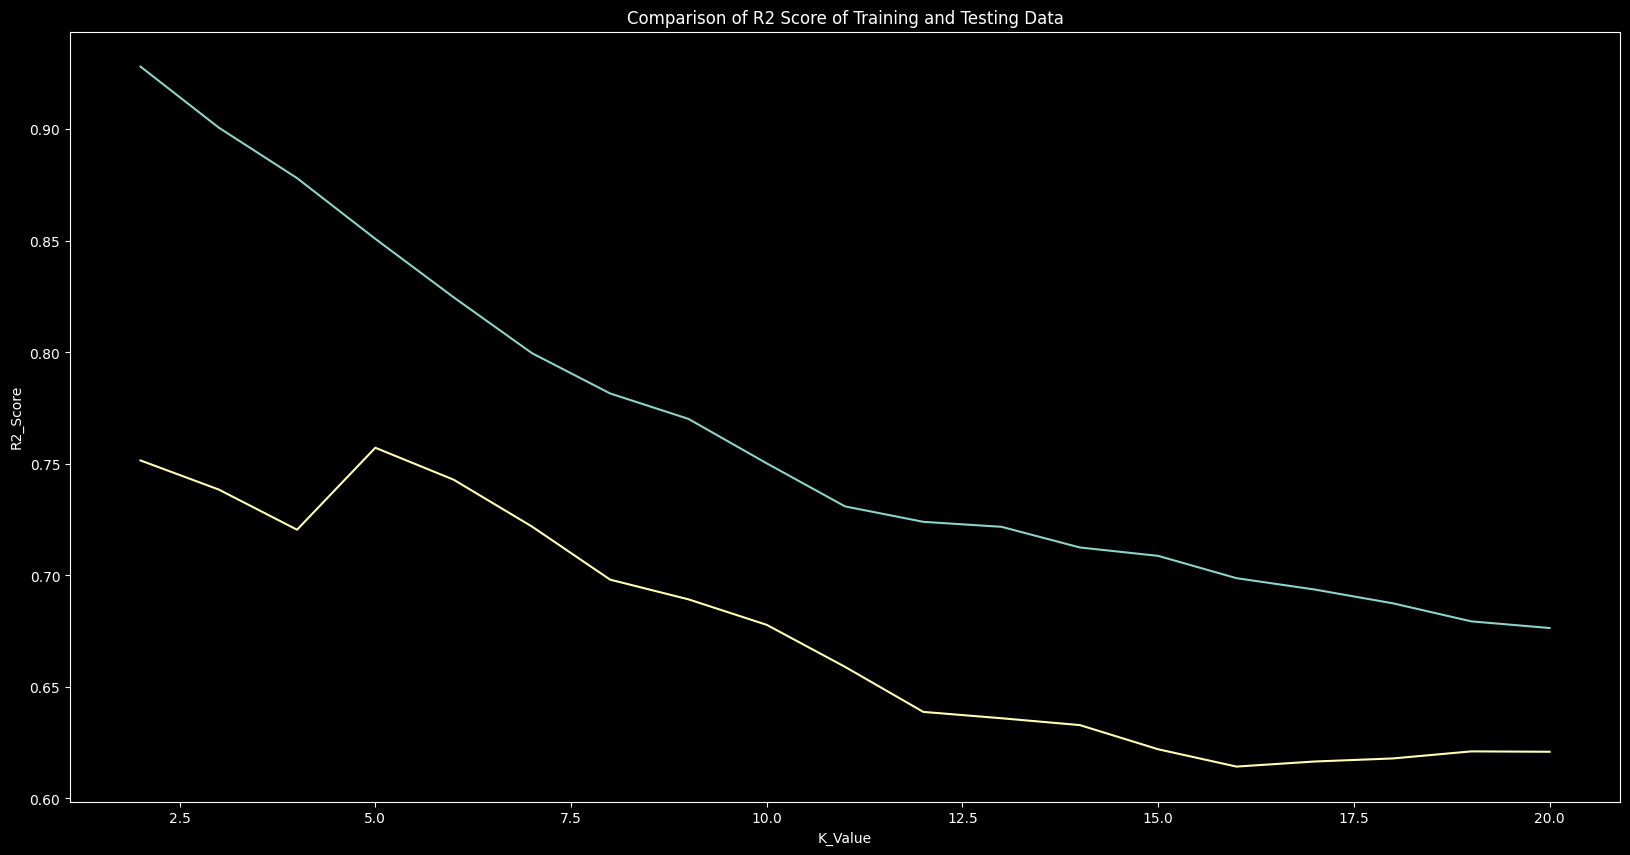

In [31]:
r2_train_list_p1 = []
r2_testing_list_p1 = []
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(normal_train_df,y_train)
    r2_training=knn_reg.score(normal_train_df,y_train)
    r2_train_list_p1.append(r2_training)

    r2_testing=knn_reg.score(normal_testing_df,y_test)
    r2_testing_list_p1.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)
plt.xlabel("K_Value")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 Score of Training and Testing Data")

For p=2

Text(0.5, 1.0, 'Comparison of R2 Score of Training and Testing Data')

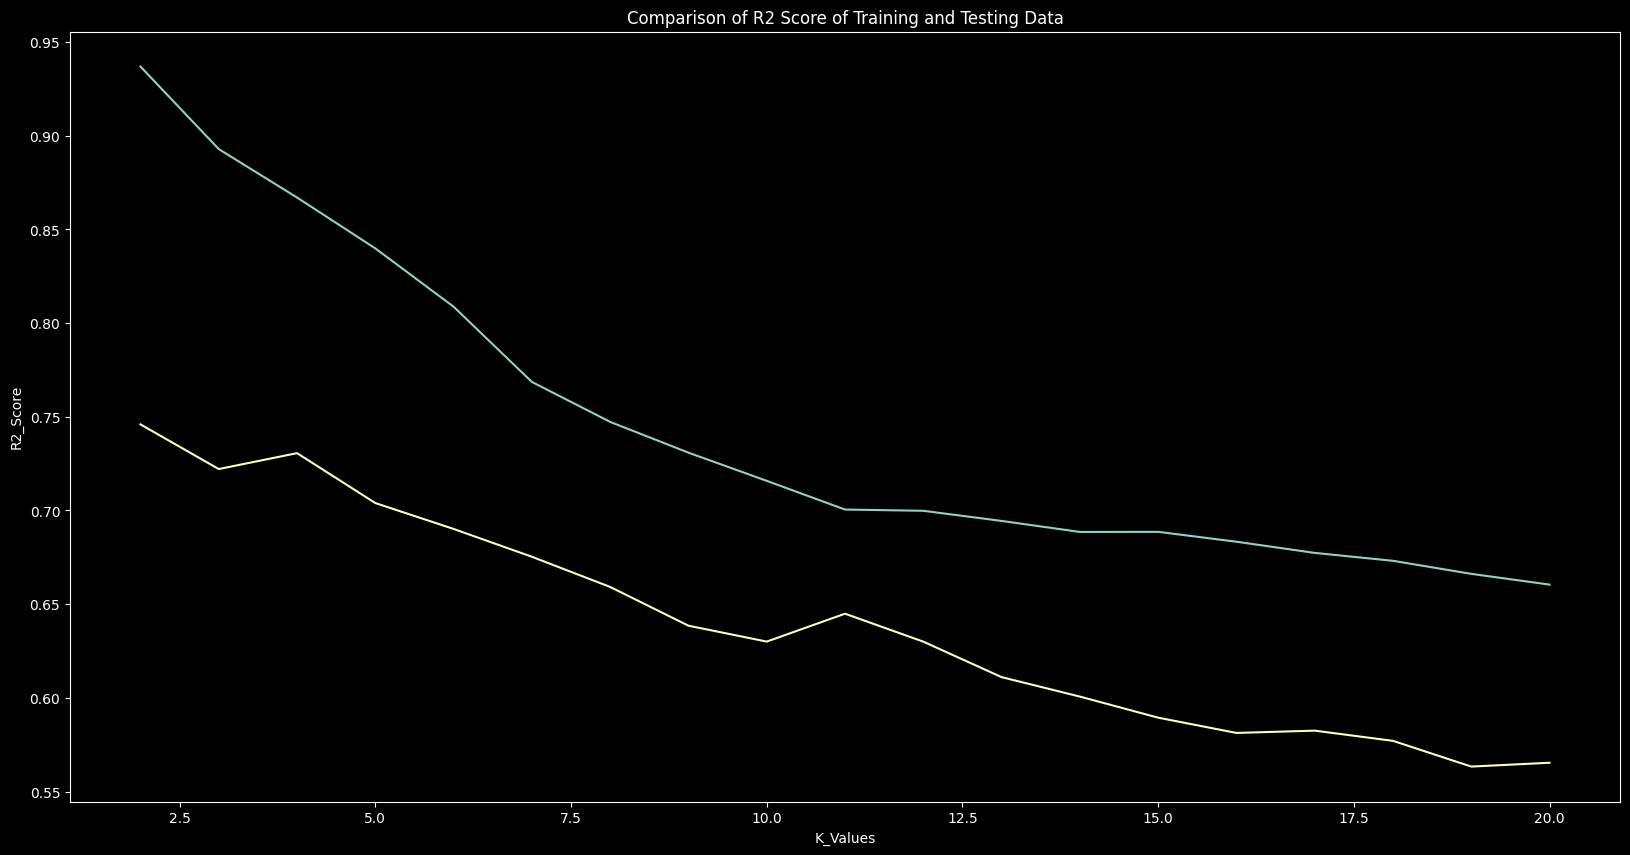

In [32]:
r2_train_list_p2 = []
r2_testing_list_p2 = []
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(normal_train_df,y_train)
    r2_training=knn_reg.score(normal_train_df,y_train)
    r2_train_list_p2.append(r2_training)

    r2_testing=knn_reg.score(normal_testing_df,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 Score of Training and Testing Data")

Standardization 

In [33]:
std_scaling = StandardScaler()
array=std_scaling.fit_transform(x_train)
std_train_df=pd.DataFrame(array,columns=x_train.columns)
std_train_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [34]:
array1=std_scaling.fit_transform(x_test)
std_testing_df=pd.DataFrame(array1,columns=x_test.columns)
std_testing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.476787,-0.440186,-1.149219,-0.25,-0.348009,0.386286,0.537480,-0.548087,-0.582846,-0.729893,-1.338941,0.413084,-0.608716
1,-0.481548,1.228922,-0.796429,4.00,-0.930972,0.904026,-1.243458,0.167253,-0.692532,-0.967732,-0.780821,0.428606,-1.373038
2,-0.474906,-0.440186,2.392130,-0.25,0.568076,-0.269215,1.048804,-0.937018,-0.692532,1.620178,0.614479,0.353326,0.643885
3,-0.476806,-0.440186,-0.138686,-0.25,-1.245586,-0.145078,-2.116535,0.771841,-0.692532,-0.678928,0.112171,0.362195,-1.096995
4,0.196583,-0.440186,0.951075,-0.25,1.530427,0.206137,0.805317,-0.687076,1.501204,1.365351,0.670291,0.297669,0.532912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2.045016,-0.440186,0.951075,-0.25,0.457035,-2.320494,1.090545,-1.094050,1.501204,1.365351,0.670291,-3.652597,2.904947
98,1.453580,-0.440186,0.951075,-0.25,1.780268,0.454410,0.857492,-0.869797,1.501204,1.365351,0.670291,-3.667010,0.641110
99,1.403721,-0.440186,0.951075,-0.25,0.457035,0.751127,1.090545,-1.107244,1.501204,1.365351,0.670291,-3.583193,1.080838
100,-0.482162,-0.440186,-1.083444,-0.25,-0.912465,-0.220771,-0.819094,0.341977,-0.802219,-1.007372,-0.278513,0.418517,-0.078823


In [35]:
knn_reg=KNeighborsRegressor()
knn_reg.fit(std_train_df,y_train)


KNeighborsRegressor()

Model Evaluation Of Training Data

In [36]:
y_pred_training=knn_reg.predict(std_train_df)
mse=mean_squared_error(y_train,y_pred_training)
print("Mean squared error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_pred_training)
print("Mean absolute error:",mae)
print("*"*80)
r_squared=r2_score(y_train,y_pred_training)
print("R2 Score is :",r_squared)

Mean squared error: 13.040274257425743
********************************************************************************
Root mean squared error: 3.611131991138754
********************************************************************************
Mean absolute error: 2.35470297029703
********************************************************************************
R2 Score is : 0.8498933657244521


Model Evaluation on Testing Data

In [37]:
y_pred_testing=knn_reg.predict(std_testing_df)
mse=mean_squared_error(y_test,y_pred_testing)
print("Mean squared error: ", mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root mean squared error: ", rmse)
print("*"*80)
mae=mean_absolute_error(y_test,y_pred_testing)
print("Mean absolute error: ", mae)
print("*"*80)
r_squared=r2_score(y_test,y_pred_testing)
print("R2 Score is : ", r_squared)

Mean squared error:  21.42554117647059
********************************************************************************
Root mean squared error:  4.628773182655485
********************************************************************************
Mean absolute error:  2.724901960784313
********************************************************************************
R2 Score is :  0.707835321551189


To find Best value of k

for p=1

Text(0.5, 1.0, 'Comparison of R2 Score of Training and Testing Data')

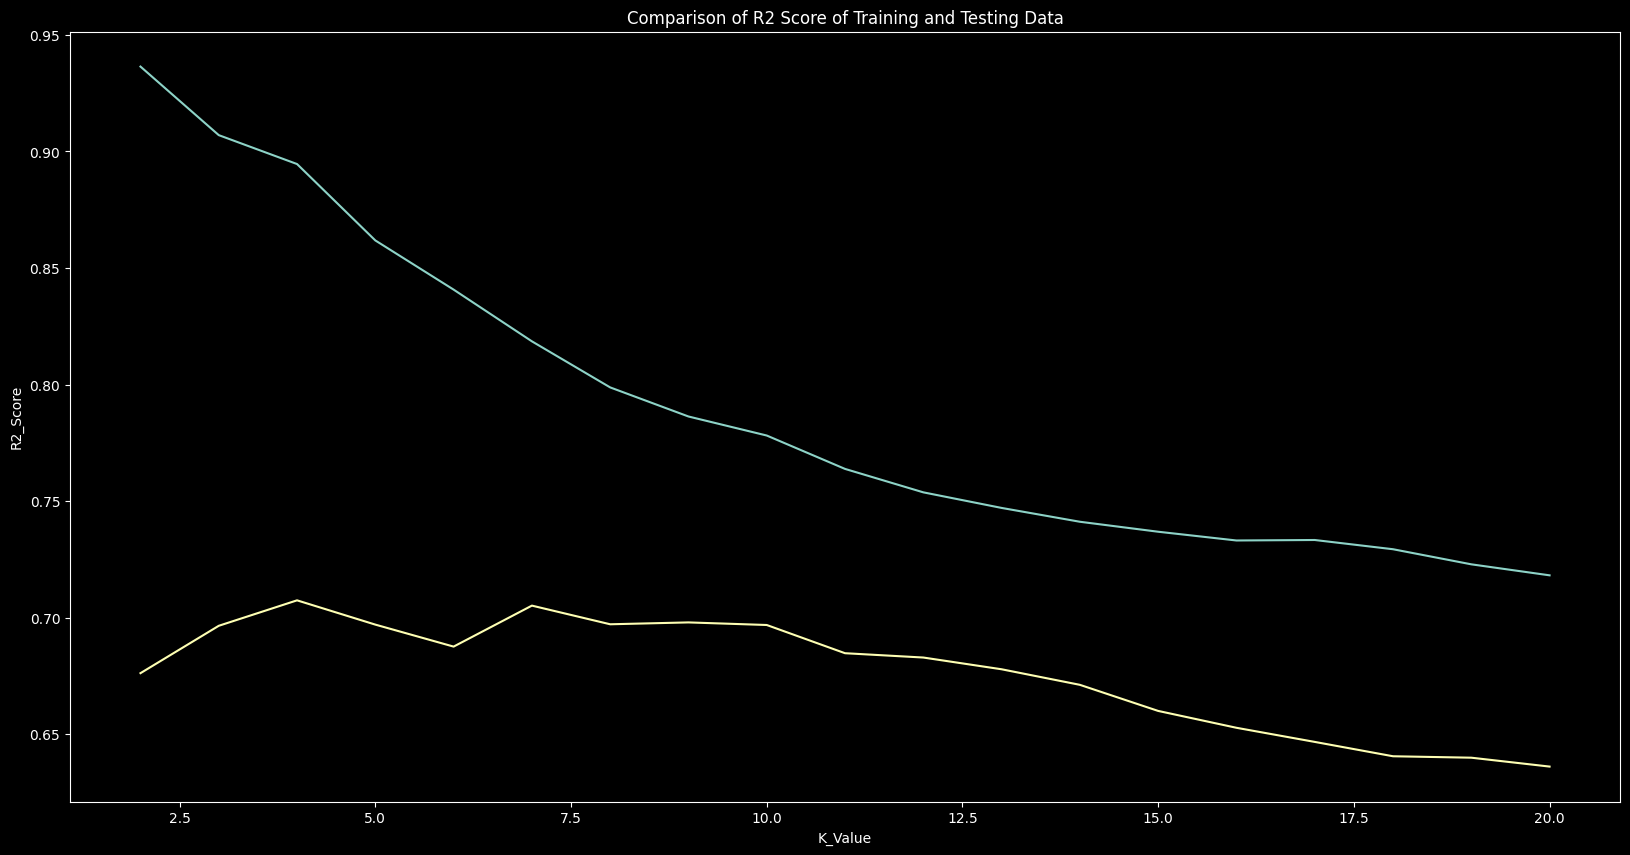

In [39]:
r2_train_list_p1 = []
r2_testing_list_p1 = []
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_df,y_train)
    r2_training=knn_reg.score(std_train_df,y_train)
    r2_train_list_p1.append(r2_training)

    r2_testing=knn_reg.score(std_testing_df,y_test)
    r2_testing_list_p1.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)
plt.xlabel("K_Value")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 Score of Training and Testing Data")

For p=2

Text(0.5, 1.0, 'Comparison of R2 Score of Training and Testing Data')

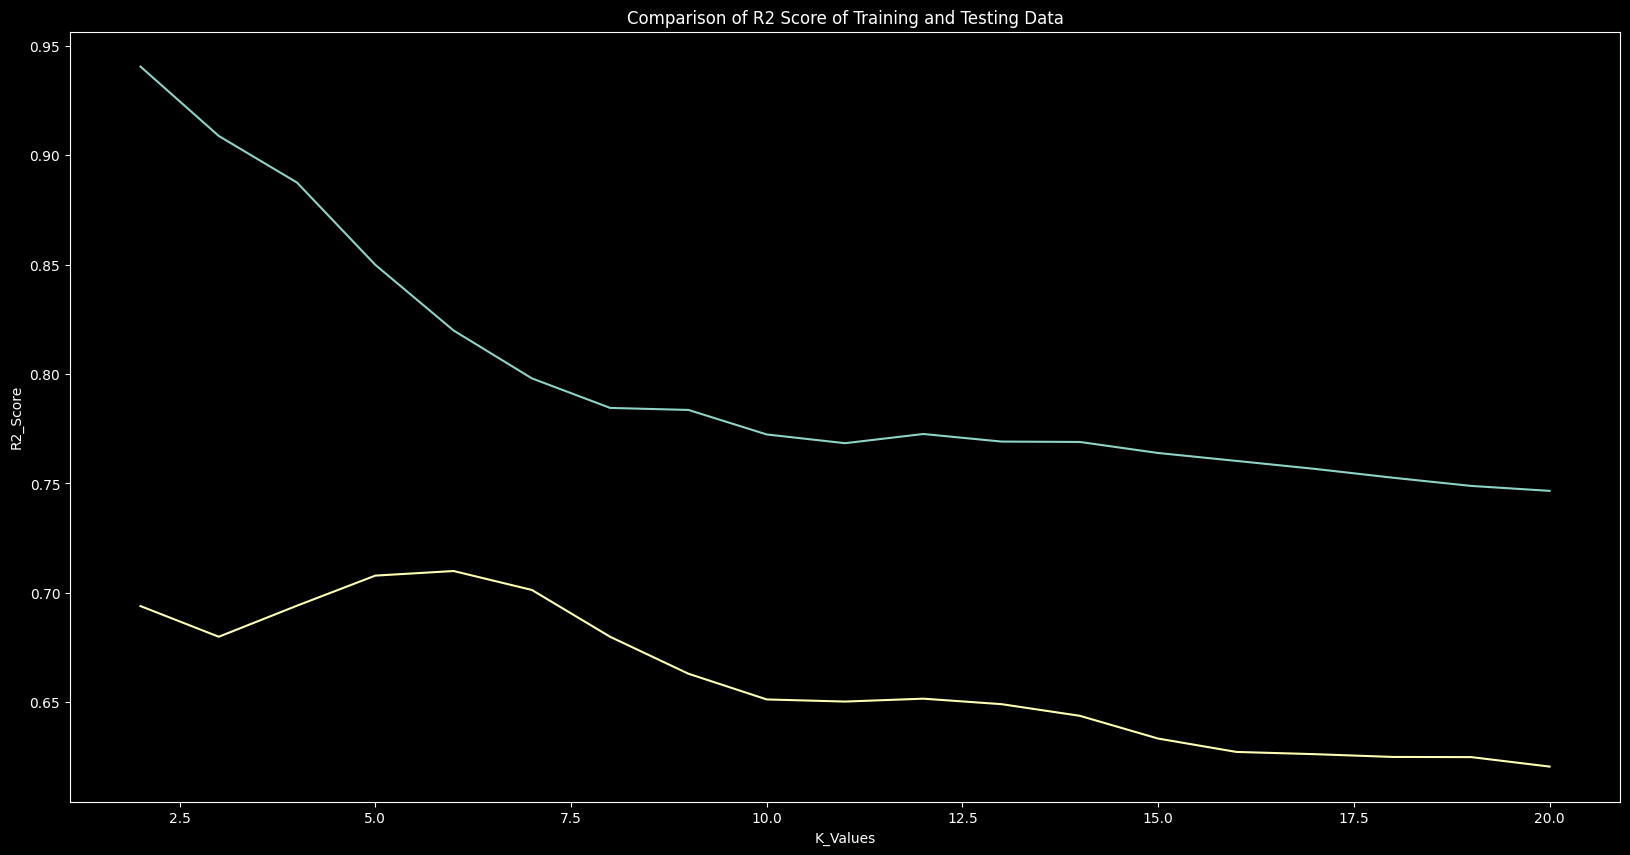

In [40]:
r2_train_list_p2 = []
r2_testing_list_p2 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(std_train_df,y_train)
    r2_training=knn_reg.score(std_train_df,y_train)
    r2_train_list_p2.append(r2_training)

    r2_testing=knn_reg.score(std_testing_df,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 Score of Training and Testing Data")

### Classification

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [42]:
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [43]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=24,stratify=y)


Model Training

In [45]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)


KNeighborsClassifier()

Testing Data Evaluation

In [47]:
y_pred_testing=knn_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[96 29]
 [32 35]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       125
           1       0.55      0.52      0.53        67

    accuracy                           0.68       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.68      0.68       192

********************************************************************************
Accuracy score : 0.6822916666666666


Training Data Evaluation

In [48]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[334  41]
 [ 67 134]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       375
           1       0.77      0.67      0.71       201

    accuracy                           0.81       576
   macro avg       0.80      0.78      0.79       576
weighted avg       0.81      0.81      0.81       576

********************************************************************************
Accuracy : 0.8125


Hyperparameters Tuning 

In [49]:
knn_clf = KNeighborsClassifier()
hyperparameters = {"n_neighbors":np.arange(3,30),
                   "p":[1,2]}
gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [50]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [51]:
gscv_knn_clf.best_params_

{'n_neighbors': 7, 'p': 2}

In [52]:
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=7)

Testing Data Evaluation 

In [53]:
y_pred_testing=knn_clf.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[96 29]
 [33 34]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.76       125
           1       0.54      0.51      0.52        67

    accuracy                           0.68       192
   macro avg       0.64      0.64      0.64       192
weighted avg       0.67      0.68      0.67       192

********************************************************************************
Accuracy score : 0.6770833333333334


Training Data Evaluation 

In [54]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[333  42]
 [ 68 133]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       375
           1       0.76      0.66      0.71       201

    accuracy                           0.81       576
   macro avg       0.80      0.77      0.78       576
weighted avg       0.81      0.81      0.81       576

********************************************************************************
Accuracy : 0.8090277777777778


Preprocessing 

Normalization

In [56]:
x_df= df.drop("Outcome",axis=1)
x_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [57]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
normal_scalar = MinMaxScaler()
array = normal_scalar.fit_transform(x_df)
x_normal_df=pd.DataFrame(array,columns=x_df.columns)
x_normal_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667
3,0.753769,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.753769,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


Train Test Split 

In [59]:
df_normal = x_normal_df.copy()
df_normal["Outcome"] = df["Outcome"]
df_normal

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667,1
3,0.753769,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.753769,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [60]:
x=df_normal.drop("Outcome",axis=1)
y=df_normal["Outcome"]

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=24,stratify=y)


Model Training

In [62]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)


KNeighborsClassifier()

Testing Data Evaluation

In [63]:
y_pred_testing=knn_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[100  25]
 [ 28  39]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       125
           1       0.61      0.58      0.60        67

    accuracy                           0.72       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192

********************************************************************************
Accuracy score : 0.7239583333333334


Training Data Evaluation

In [64]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[332  43]
 [ 59 142]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       375
           1       0.77      0.71      0.74       201

    accuracy                           0.82       576
   macro avg       0.81      0.80      0.80       576
weighted avg       0.82      0.82      0.82       576

********************************************************************************
Accuracy : 0.8229166666666666


Hyperparameters tuning on Normalized Data 

In [65]:
knn_clf = KNeighborsClassifier()
hyperparameters = {"n_neighbors":np.arange(3,30),
                   "p":[1,2]}
gscv_knn_clf = GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [66]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=19, p=1)

In [67]:
knn_clf=gscv_knn_clf.best_estimator_
knn_clf.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=19, p=1)

Testing Data Evaluation

In [68]:
y_pred_testing=knn_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[108  17]
 [ 33  34]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       125
           1       0.67      0.51      0.58        67

    accuracy                           0.74       192
   macro avg       0.72      0.69      0.69       192
weighted avg       0.73      0.74      0.73       192

********************************************************************************
Accuracy score : 0.7395833333333334


Training Data Evaluation

In [69]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[341  34]
 [ 86 115]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       375
           1       0.77      0.57      0.66       201

    accuracy                           0.79       576
   macro avg       0.79      0.74      0.75       576
weighted avg       0.79      0.79      0.78       576

********************************************************************************
Accuracy : 0.7916666666666666


Standardization 

In [70]:
x_df = df.drop("Outcome",axis=1)
x_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [71]:
std_scalar = StandardScaler()
array = std_scalar.fit_transform(x_df)

x_std_df=pd.DataFrame(array,columns=x_df.columns)
x_std_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022
1,-1.136319,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927
2,1.946957,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227
3,0.908711,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953
4,0.908711,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722
...,...,...,...,...,...,...,...
763,-0.632927,0.357691,1.722735,0.870031,0.115169,-0.908682,2.532356
764,0.027775,0.047697,0.405445,-0.692891,0.610154,-0.398282,-0.531337
765,-0.003687,0.151028,0.154533,0.279594,-0.735190,-0.685193,-0.276029
766,0.153623,-0.468961,-1.288212,-0.692891,-0.240205,-0.371101,1.170715


In [72]:
df_std = x_std_df.copy()
df_std["Outcome"]=df["Outcome"]
df_std

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.845787,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022,1
1,-1.136319,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927,0
2,1.946957,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227,1
3,0.908711,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953,0
4,0.908711,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722,1
...,...,...,...,...,...,...,...,...
763,-0.632927,0.357691,1.722735,0.870031,0.115169,-0.908682,2.532356,0
764,0.027775,0.047697,0.405445,-0.692891,0.610154,-0.398282,-0.531337,0
765,-0.003687,0.151028,0.154533,0.279594,-0.735190,-0.685193,-0.276029,0
766,0.153623,-0.468961,-1.288212,-0.692891,-0.240205,-0.371101,1.170715,1


In [73]:
x=df_std.drop("Outcome",axis=1)
y=df_std["Outcome"]


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=24,stratify=y)

Model Training

In [75]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)


KNeighborsClassifier()

Testing Data Evaluation

In [76]:
y_pred_testing=knn_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[102  23]
 [ 30  37]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       125
           1       0.62      0.55      0.58        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.72      0.72      0.72       192

********************************************************************************
Accuracy score : 0.7239583333333334


Training Data Evaluation

In [77]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[334  41]
 [ 63 138]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       375
           1       0.77      0.69      0.73       201

    accuracy                           0.82       576
   macro avg       0.81      0.79      0.80       576
weighted avg       0.82      0.82      0.82       576

********************************************************************************
Accuracy : 0.8194444444444444


With Hyperparameters tuning

In [78]:
knn_clf = KNeighborsClassifier()
hyperparameters = {"n_neighbors":np.arange(3,30),
                   "p":[1,2]}
gscv_knn_clf=GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [79]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=23, p=1)

In [80]:
knn_clf=gscv_knn_clf.best_estimator_
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23, p=1)

Testing Data Evaluation

In [81]:
y_pred_testing=knn_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Classification Report:\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy score :",accuracy)

Confusion Matrix :
 [[108  17]
 [ 35  32]]
********************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       125
           1       0.65      0.48      0.55        67

    accuracy                           0.73       192
   macro avg       0.70      0.67      0.68       192
weighted avg       0.72      0.73      0.72       192

********************************************************************************
Accuracy score : 0.7291666666666666


Training Data Evaluation

In [82]:
y_pred_training=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_training)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
clf_report=classification_report(y_train,y_pred_training)
print("Classification Report :\n",clf_report)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_training)
print("Accuracy :",accuracy)

Confusion Matrix :
 [[347  28]
 [ 89 112]]
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       375
           1       0.80      0.56      0.66       201

    accuracy                           0.80       576
   macro avg       0.80      0.74      0.76       576
weighted avg       0.80      0.80      0.79       576

********************************************************************************
Accuracy : 0.796875


# K nearest neighbors
* It is supervised machine learning algorithm used for both classification and regression
* KNN is Distance based algorithm
* Feature scaling is required for KNN 
* Distance >> Eucledian distance (P=2) in sklearn 
              Manhattan distance (P=1) in sklearn
* KNN is non Parametric algorithm
* NON parametric algorithm >> No assumptions on distribution of data

# Steps of KNN Algorithm 
1. Load the data 
2. Select the number of k neighbors
3. Calculate the distance with all points 
4. Sort the distance in ascending order 
5. Pick the first k neighbors from the sorted collection
6. Classification >> Class label assigned to the majority of the k neighbors
7. Regression >> return the mean of the K label 

# Faeture Scaling 
1. Normalization >> MinMAxScalar
2. Standardization >> StandardScalar

> Distance based algorithm : (Scaling is recommended)
1. KNN
2. Kmeans clustering
3. PCA 
4. SVM

> Gradient Descent based algorithm : (Scaling is optional)
1. Linear regression
2. Logistic regression
3. Lasso regression
4. Ridge regression
5. Neural network

> Tree based algorithm : (Scaling is not recommended)
1. Decision Tree
2. Random Forest
3. AdaBoost 
4. Gradient Boost
5. XGBoost


# Normalization 
* It uses minimum and maximum value of a particular column
* Range is fixed >> 0 to 1
> formula Xnew = (Xi - Xmin) / (Xmax - Xmin)
* Xmin >> Minimum value 
* Xmax >> Maximum value
* Sensitive to outliers 
* If the data is normally distributed

# Standardization 
> Formula = (Xi - Xmean) / Xstd
* Range is not fixed : -inf to +inf 
* ideal range is >> -3 to +3
* Z - score normalization 
* Not Impacted by outliers 
* If the data is not normally distributed 

# Advantages 
1. The algorithm is simple and easay to implement 
2. Theres no need to build model,tune several parameters,or make additional assumptions
3. The algorithm is versatile.It can be used for Classification and regression
4. Work with any number of classes ,not just binary classifiers 
5. Efficient methos for small data sets

# Disadvantages 
1. The Computational cost is high because of calculating the distance between all data points for all training 
   samples 
2. Feature Scaling is required(Normalization and Standardization)
3. Alway need to determine the value of K which may be complex sometimes 
4. Doesn't work as expected when working with a big number of features/parameters 
   (Larger Datasets take longer time to process)
   > select best feature using :
   1. Feature Selection
   2. Feature Extraction >> Principal Component analysis(PCA)
5. Noisy data can result in overfitting or underfitting of data 
6. Sensitive to outliers

# KNN Regression

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [31]:
df=pd.read_csv("Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [32]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [33]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [35]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Train Test Split 

In [37]:
x=df.drop("medv",axis=1)
y=df["medv"]

In [38]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [39]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=22)

In [41]:
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
164,2.24236,0.0,19.58,0,0.605,5.854,91.8,2.4220,5,403,14.7,395.11,11.64
312,0.26169,0.0,9.90,0,0.544,6.023,90.4,2.8340,4,304,18.4,396.30,11.72
120,0.06899,0.0,25.65,0,0.581,5.870,69.7,2.2577,2,188,19.1,389.15,14.37
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
26,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307,21.0,376.88,14.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,8.98296,0.0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60
448,9.32909,0.0,18.10,0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13
300,0.04417,70.0,2.24,0,0.400,6.871,47.4,7.8278,5,358,14.8,390.86,6.07
132,0.59005,0.0,21.89,0,0.624,6.372,97.9,2.3274,4,437,21.2,385.76,11.12


In [42]:
y_train

164    22.7
312    19.4
120    22.0
274    32.4
26     16.6
       ... 
356    17.8
448    14.1
300    24.8
132    23.0
373    13.8
Name: medv, Length: 404, dtype: float64

Model Training

In [43]:
knn_reg = KNeighborsRegressor(n_neighbors=5,p=1)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(p=1)

Evaluation for Testing

In [44]:
y_pred_testing = knn_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred_testing)
print("Mean Squared Error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_test,y_pred_testing)
print("Mean Absolute Error:",mae)
print("*"*80)
r_squared=r2_score(y_test,y_pred_testing)
print("R2 Score :",r_squared)

Mean Squared Error: 31.582752941176473
********************************************************************************
Root Mean Squared Error: 5.619853462607052
********************************************************************************
Mean Absolute Error: 3.827450980392156
********************************************************************************
R2 Score : 0.643807245026979


Evaluation of Training

In [45]:
y_pred_train=knn_reg.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error: ",mae)
print("*"*80)
r_squared=r2_score(y_train,y_pred_train)
print("R2 Score : ",r_squared)

Mean Squared Error:  22.642657425742573
********************************************************************************
Root Mean Squared Error:  4.75843014299281
********************************************************************************
Mean Absolute Error:  3.2095049504950492
********************************************************************************
R2 Score :  0.7282972053837096


For P = 1

In [46]:
k_values = range(2,21)
list(k_values)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Text(0.5, 1.0, 'Comparison of R2 Score of Training and Testing Values')

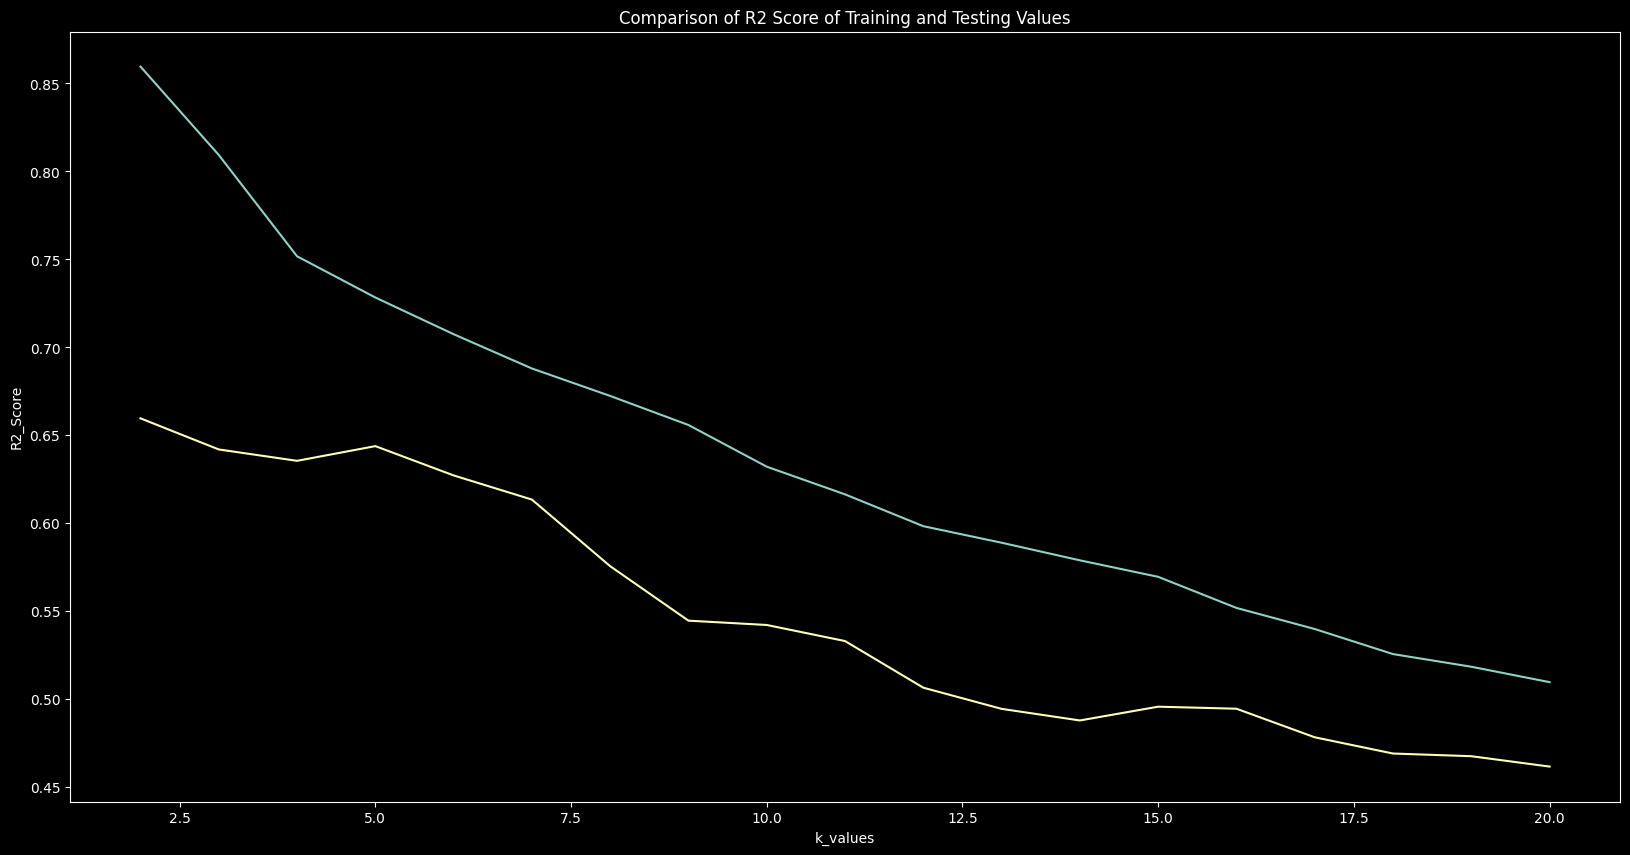

In [47]:
r2_train_list_p1 = []
r2_testing_list_p1 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    r2_training=knn_reg.score(x_train,y_train)
    r2_train_list_p1.append(r2_training)

    r2_testing=knn_reg.score(x_test,y_test)
    r2_testing_list_p1.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)
plt.xlabel("k_values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 Score of Training and Testing Values")

Text(0.5, 1.0, 'Comparison of R2 score of Training and Testing')

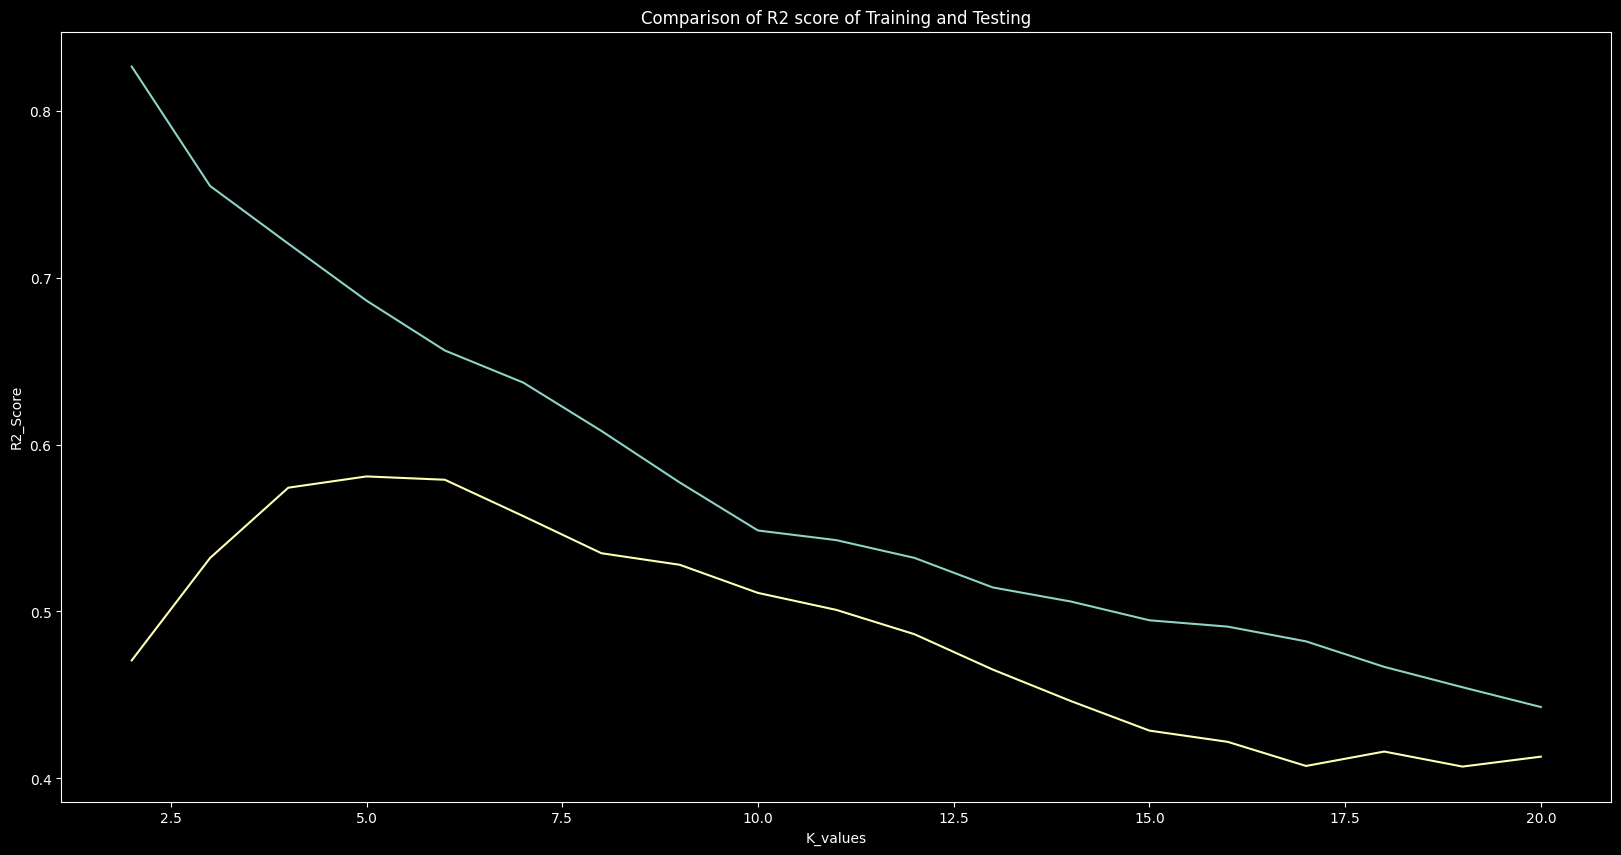

In [48]:
r2_train_list_p2 = []
r2_testing_list_p2 = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    r2_training=knn_reg.score(x_train,y_train)
    r2_train_list_p2.append(r2_training)
    r2_testing=knn_reg.score(x_test,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("K_values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 score of Training and Testing")

Preprocessing

In [49]:
x=df.drop("medv",axis=1)
y=df["medv"]


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


In [51]:
x_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Normalization

only on training data 

In [52]:
normal_scaling=MinMaxScaler()
normal_scaling.fit(x_train)
normal_train_df = pd.DataFrame(normal_scaling.transform(x_train),columns=x_train.columns)
normal_train_df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.168763,0.00,0.642963,0.0,0.471193,0.293065,0.972194,0.088307,1.000000,0.914122,0.808511,0.880428,0.639625
1,0.006950,0.00,0.274074,0.0,0.314815,0.400854,0.552008,0.306359,0.130435,0.229008,0.893617,0.996772,0.185982
2,0.000288,0.35,0.197037,0.0,0.108848,0.440919,0.210093,0.501150,0.000000,0.223282,0.457447,0.912628,0.168322


Without Hyperparameter tuning

In [53]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(normal_train_df,y_train)



KNeighborsRegressor()

On Training Data 

In [54]:
y_pred_train=knn_reg.predict(normal_train_df)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error: ",mae)
print("*"*80)
r_squared=r2_score(y_train,y_pred_train)
print("R2 Score : ",r_squared)

Mean Squared Error:  13.918433663366336
********************************************************************************
Root Mean Squared Error:  3.730741704187833
********************************************************************************
Mean Absolute Error:  2.421188118811881
********************************************************************************
R2 Score :  0.8397848702909227


In [56]:
array = normal_scaling.transform(x_test)
normal_testing_df=pd.DataFrame(array,columns=x_test.columns)
normal_testing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000930,0.0,0.122593,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711
1,0.000533,0.4,0.210000,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
2,0.001087,0.0,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
3,0.000928,0.0,0.372963,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
4,0.057112,0.0,0.642963,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.211336,0.0,0.642963,0.0,0.436214,0.155583,1.000000,0.038584,1.000000,0.914122,0.808511,0.071789,0.900662
98,0.161989,0.0,0.642963,0.0,0.730453,0.528371,0.930999,0.079386,1.000000,0.914122,0.808511,0.068511,0.450331
99,0.157830,0.0,0.642963,0.0,0.436214,0.568233,1.000000,0.036183,1.000000,0.914122,0.808511,0.087574,0.537804
100,0.000481,0.0,0.138889,0.0,0.131687,0.437665,0.434604,0.299866,0.086957,0.114504,0.627660,0.997705,0.307119


Testing Data Evaluation

In [57]:
y_pred_testing = knn_reg.predict(normal_testing_df)
mse = mean_squared_error(y_test,y_pred_testing)
print("Mean Squared Error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_test,y_pred_testing)
print("Mean Absolute Error:",mae)
print("*"*80)
r_squared=r2_score(y_test,y_pred_testing)
print("R2 Score :",r_squared)

Mean Squared Error: 21.7121843137255
********************************************************************************
Root Mean Squared Error: 4.659633495643783
********************************************************************************
Mean Absolute Error: 2.6566666666666676
********************************************************************************
R2 Score : 0.7039265754739785


Find best Value of k

For P=1

Text(0.5, 1.0, 'Comparison of R2-score of training and testing')

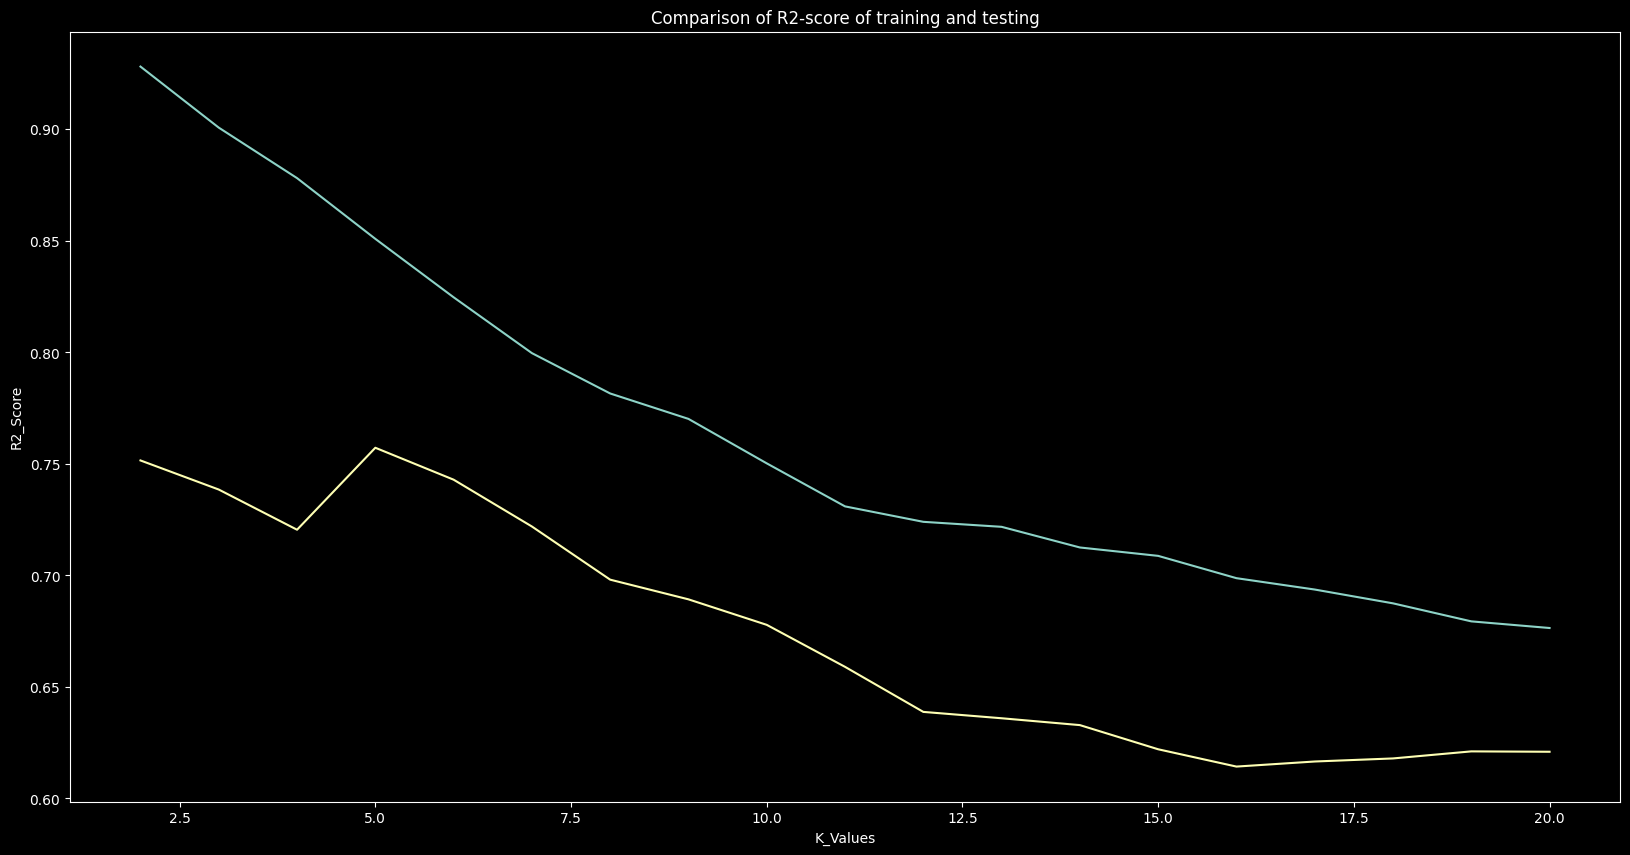

In [59]:
r2_train_list_p1 = []
r2_testing_list_p1 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(normal_train_df,y_train)
    r2_training=knn_reg.score(normal_train_df,y_train)
    r2_train_list_p1.append(r2_training)
    r2_testing=knn_reg.score(normal_testing_df,y_test)
    r2_testing_list_p1.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)
plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2-score of training and testing")

for p=2 

Text(0.5, 1.0, 'Comparison of R2 score of training and testing')

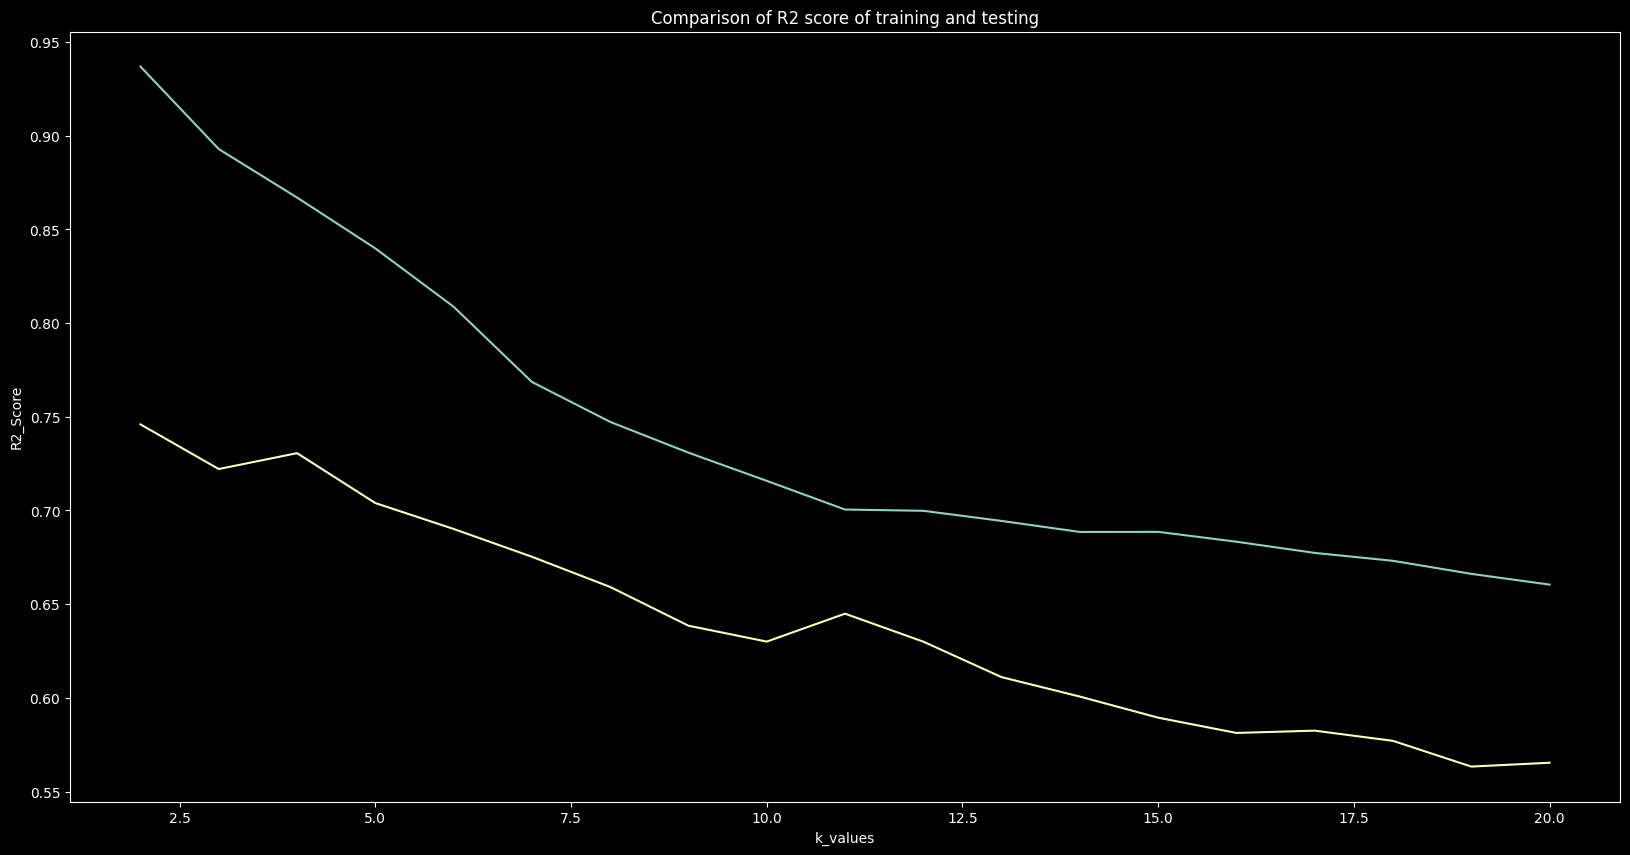

In [61]:
r2_train_list_p2 = []
r2_testing_list_p2 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(normal_train_df,y_train)
    r2_training=knn_reg.score(normal_train_df,y_train)
    r2_train_list_p2.append(r2_training)
    r2_testing=knn_reg.score(normal_testing_df,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("k_values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 score of training and testing")

# Standardization

In [62]:
std_scaling = StandardScaler()
std_scaling.fit(x_train)
std_train_df=pd.DataFrame(std_scaling.transform(x_train),columns=x.columns)
std_train_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [63]:
std_scaling.fit(x_test)
std_testing_df=pd.DataFrame(std_scaling.transform(x_test),columns=x.columns)
std_testing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.476787,-0.440186,-1.149219,-0.25,-0.348009,0.386286,0.537480,-0.548087,-0.582846,-0.729893,-1.338941,0.413084,-0.608716
1,-0.481548,1.228922,-0.796429,4.00,-0.930972,0.904026,-1.243458,0.167253,-0.692532,-0.967732,-0.780821,0.428606,-1.373038
2,-0.474906,-0.440186,2.392130,-0.25,0.568076,-0.269215,1.048804,-0.937018,-0.692532,1.620178,0.614479,0.353326,0.643885
3,-0.476806,-0.440186,-0.138686,-0.25,-1.245586,-0.145078,-2.116535,0.771841,-0.692532,-0.678928,0.112171,0.362195,-1.096995
4,0.196583,-0.440186,0.951075,-0.25,1.530427,0.206137,0.805317,-0.687076,1.501204,1.365351,0.670291,0.297669,0.532912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2.045016,-0.440186,0.951075,-0.25,0.457035,-2.320494,1.090545,-1.094050,1.501204,1.365351,0.670291,-3.652597,2.904947
98,1.453580,-0.440186,0.951075,-0.25,1.780268,0.454410,0.857492,-0.869797,1.501204,1.365351,0.670291,-3.667010,0.641110
99,1.403721,-0.440186,0.951075,-0.25,0.457035,0.751127,1.090545,-1.107244,1.501204,1.365351,0.670291,-3.583193,1.080838
100,-0.482162,-0.440186,-1.083444,-0.25,-0.912465,-0.220771,-0.819094,0.341977,-0.802219,-1.007372,-0.278513,0.418517,-0.078823


In [64]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(std_train_df,y_train)


KNeighborsRegressor()

Evaluation for training data

In [65]:
y_pred_train=knn_reg.predict(std_train_df)
mse=mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error: ",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error: ",rmse)
print("*"*80)
mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error: ",mae)
print("*"*80)
r_squared=r2_score(y_train,y_pred_train)
print("R2 Score : ",r_squared)

Mean Squared Error:  13.040274257425743
********************************************************************************
Root Mean Squared Error:  3.611131991138754
********************************************************************************
Mean Absolute Error:  2.35470297029703
********************************************************************************
R2 Score :  0.8498933657244521


Evaluation for testing data 

In [66]:
y_pred_testing = knn_reg.predict(std_testing_df)
mse = mean_squared_error(y_test,y_pred_testing)
print("Mean Squared Error:",mse)
print("*"*80)
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)
print("*"*80)
mae=mean_absolute_error(y_test,y_pred_testing)
print("Mean Absolute Error:",mae)
print("*"*80)
r_squared=r2_score(y_test,y_pred_testing)
print("R2 Score :",r_squared)

Mean Squared Error: 21.42554117647059
********************************************************************************
Root Mean Squared Error: 4.628773182655485
********************************************************************************
Mean Absolute Error: 2.724901960784313
********************************************************************************
R2 Score : 0.707835321551189


Hyper parameter tuning 

For P=1

Text(0.5, 1.0, 'Comparison of R2-score of training and testing')

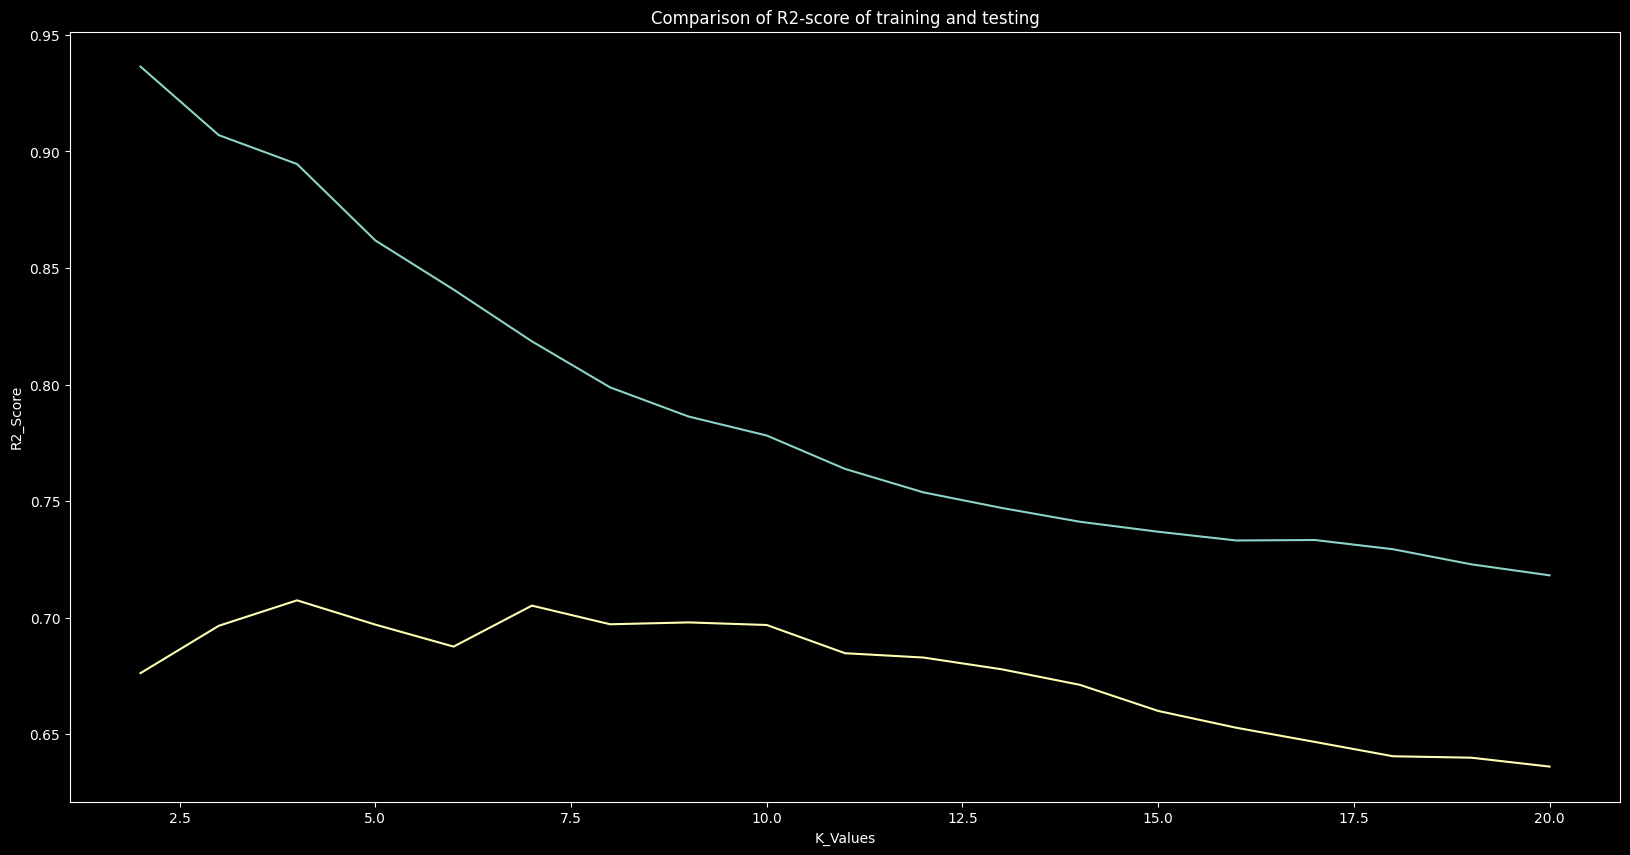

In [67]:
r2_train_list_p1 = []
r2_testing_list_p1 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_df,y_train)
    r2_training=knn_reg.score(std_train_df,y_train)
    r2_train_list_p1.append(r2_training)
    r2_testing=knn_reg.score(std_testing_df,y_test)
    r2_testing_list_p1.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p1)
plt.plot(k_values,r2_testing_list_p1)
plt.xlabel("K_Values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2-score of training and testing")

For P=2

Text(0.5, 1.0, 'Comparison of R2 score of training and testing')

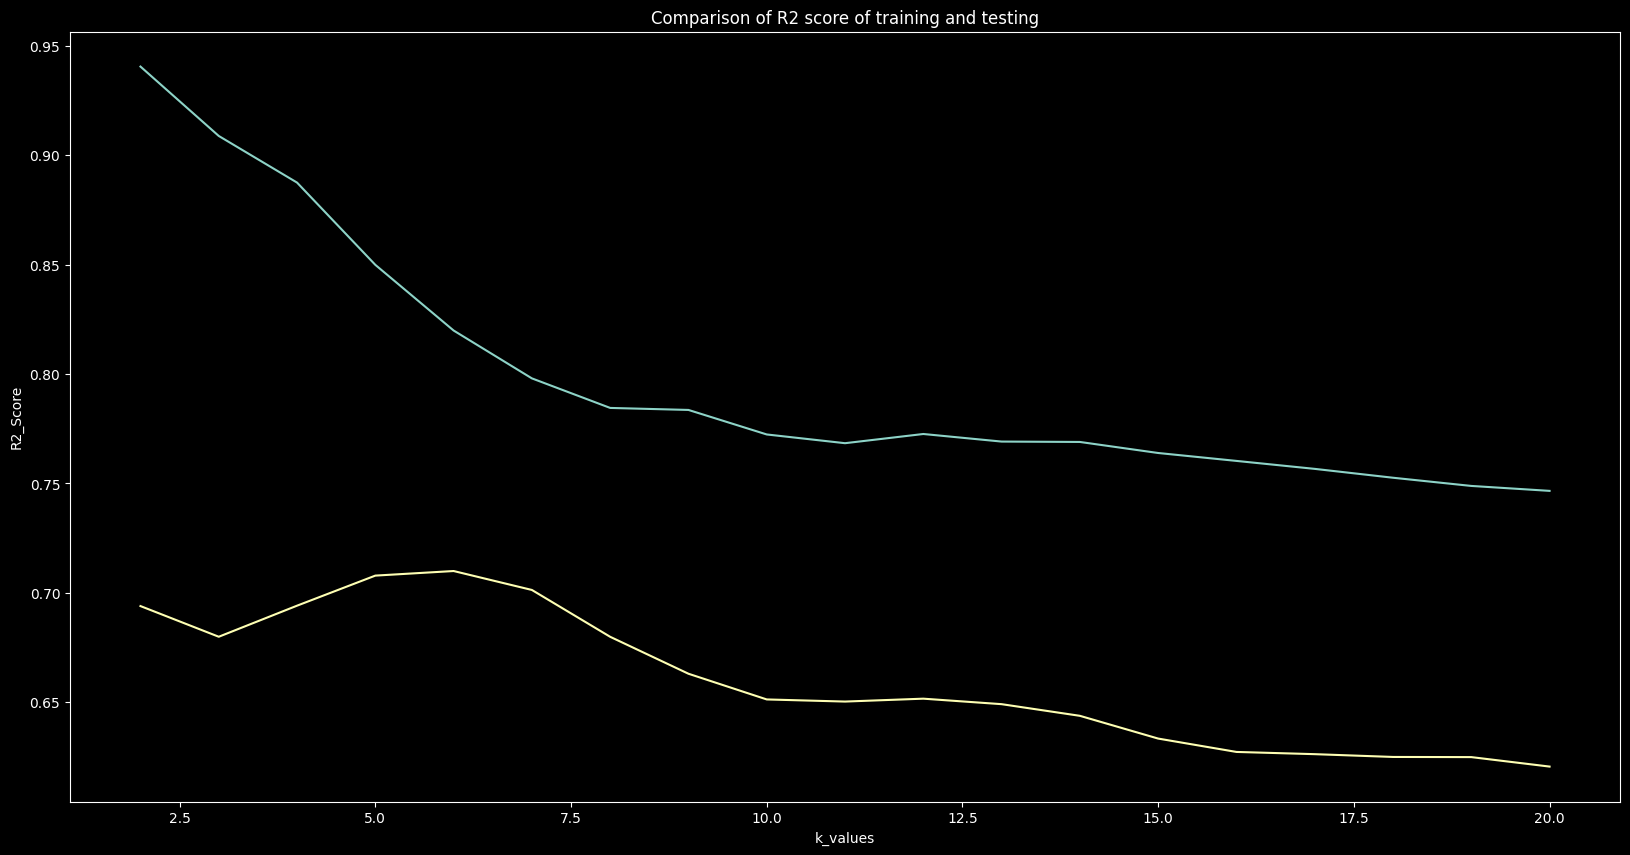

In [68]:
r2_train_list_p2 = []
r2_testing_list_p2 = []
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(std_train_df,y_train)
    r2_training=knn_reg.score(std_train_df,y_train)
    r2_train_list_p2.append(r2_training)
    r2_testing=knn_reg.score(std_testing_df,y_test)
    r2_testing_list_p2.append(r2_testing)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list_p2)
plt.plot(k_values,r2_testing_list_p2)
plt.xlabel("k_values")
plt.ylabel("R2_Score")
plt.title("Comparison of R2 score of training and testing")

# classification

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [70]:
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [72]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [73]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=35,stratify=y)


In [75]:
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

Model Training 

In [76]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)


KNeighborsClassifier()

Testing data Evaluation

In [77]:
y_pred_testing = knn_clf.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy :",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("Clf report :\n",clf_report)

Confusion Matrix :
 [[85 15]
 [21 33]]
********************************************************************************
Accuracy : 0.7662337662337663
********************************************************************************
Clf report :
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



Training Data Evaluation

In [78]:
y_pred_train=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf Report :\n",clf_report)

Confusion Matrix:
 [[345  55]
 [ 69 145]]
********************************************************************************
Accuracy :  0.7980456026058632
********************************************************************************
Clf Report :
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       400
           1       0.72      0.68      0.70       214

    accuracy                           0.80       614
   macro avg       0.78      0.77      0.77       614
weighted avg       0.80      0.80      0.80       614



Hyperparameters tuning

In [79]:
knn_clf = KNeighborsClassifier()
hyperparameters = {"n_neighbors":np.arange(3,30),
                   "p":[1,2]}
gscv_knn_clf=GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [80]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=21, p=1)

In [81]:
gscv_knn_clf.best_params_

{'n_neighbors': 21, 'p': 1}

In [82]:
knn_clf=gscv_knn_clf.best_estimator_
knn_clf.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=21, p=1)

Evaluation on testing data 

In [83]:
y_pred_testing = knn_clf.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("confusion_matrix:\n",confusion_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("clf_report:\n",clf_report)
print("*"*80)

confusion_matrix:
 <function confusion_matrix at 0x000002C37AC94FE0>
********************************************************************************
Accuracy:  0.7727272727272727
********************************************************************************
clf_report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.71      0.59      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

********************************************************************************


Evaluation on Training Data

In [84]:
y_pred_train=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf Report :\n",clf_report)

Confusion Matrix:
 [[349  51]
 [ 88 126]]
********************************************************************************
Accuracy :  0.7736156351791531
********************************************************************************
Clf Report :
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       400
           1       0.71      0.59      0.64       214

    accuracy                           0.77       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614



Preprocessing

Normalization

In [86]:
x_df = df.drop("Outcome",axis=1)
x_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [87]:
x_df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [88]:
normal_scalar = MinMaxScaler()
array = normal_scalar.fit_transform(x_df)
x_normal_df=pd.DataFrame(array,columns=x_df.columns)
x_normal_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667
3,0.753769,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.753769,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


Train Test Split

In [89]:
df_normal = x_normal_df.copy()
df_normal["Outcome"] = df["Outcome"]
df_normal

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.743719,0.409836,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.516667,1
3,0.753769,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.753769,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...
763,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [92]:
x=df_normal.drop("Outcome",axis=1)
y=df_normal["Outcome"]

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=35,stratify=y)


Model Training

In [94]:
knn_clf=KNeighborsClassifier(n_neighbors=21,p=1)
knn_clf.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=21, p=1)

Testing Data Evaluation

In [95]:
y_pred_testing = knn_clf.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("confusion_matrix:\n",confusion_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("clf_report:\n",clf_report)
print("*"*80)

confusion_matrix:
 <function confusion_matrix at 0x000002C37AC94FE0>
********************************************************************************
Accuracy:  0.7857142857142857
********************************************************************************
clf_report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.57      0.65        54

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

********************************************************************************


Training Data Evaluation

In [96]:
y_pred_train=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf Report :\n",clf_report)

Confusion Matrix:
 [[358  42]
 [ 89 125]]
********************************************************************************
Accuracy :  0.7866449511400652
********************************************************************************
Clf Report :
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       400
           1       0.75      0.58      0.66       214

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614



Hyperparameter Tuning

In [97]:
knn_clf = KNeighborsClassifier()
hyperparameters = {"n_neighbors":np.arange(3,30),
                   "p":[1,2]}
gscv_knn_clf=GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [98]:
gscv_knn_clf.best_estimator_

KNeighborsClassifier(n_neighbors=14)

In [99]:
gscv_knn_clf.best_params_

{'n_neighbors': 14, 'p': 2}

In [100]:
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

Testing Data Evaluation 

In [101]:
y_pred_testing = knn_clf.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("confusion_matrix:\n",confusion_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("clf_report:\n",clf_report)
print("*"*80)

confusion_matrix:
 <function confusion_matrix at 0x000002C37AC94FE0>
********************************************************************************
Accuracy:  0.7662337662337663
********************************************************************************
clf_report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.72      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154

********************************************************************************


TRaining Data Evaluation

In [102]:
y_pred_train=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf Report :\n",clf_report)

Confusion Matrix:
 [[364  36]
 [ 95 119]]
********************************************************************************
Accuracy :  0.7866449511400652
********************************************************************************
Clf Report :
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       400
           1       0.77      0.56      0.64       214

    accuracy                           0.79       614
   macro avg       0.78      0.73      0.75       614
weighted avg       0.78      0.79      0.78       614



# Standardization

In [103]:
x_df = df.drop("Outcome",axis=1)
x_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,50,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,52
3,150,66,23,94,28.1,0.167,21
4,150,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [104]:
std_scalar =StandardScaler()
array=std_scalar.fit_transform(x_df)
x_std_df=pd.DataFrame(array,columns=x_df.columns)
x_std_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022
1,-1.136319,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927
2,1.946957,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227
3,0.908711,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953
4,0.908711,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722
...,...,...,...,...,...,...,...
763,-0.632927,0.357691,1.722735,0.870031,0.115169,-0.908682,2.532356
764,0.027775,0.047697,0.405445,-0.692891,0.610154,-0.398282,-0.531337
765,-0.003687,0.151028,0.154533,0.279594,-0.735190,-0.685193,-0.276029
766,0.153623,-0.468961,-1.288212,-0.692891,-0.240205,-0.371101,1.170715


In [105]:
df_std=x_std_df.copy()
df_std["Outcome"] =df["Outcome"]
df_std

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.845787,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022,1
1,-1.136319,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927,0
2,1.946957,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227,1
3,0.908711,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953,0
4,0.908711,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722,1
...,...,...,...,...,...,...,...,...
763,-0.632927,0.357691,1.722735,0.870031,0.115169,-0.908682,2.532356,0
764,0.027775,0.047697,0.405445,-0.692891,0.610154,-0.398282,-0.531337,0
765,-0.003687,0.151028,0.154533,0.279594,-0.735190,-0.685193,-0.276029,0
766,0.153623,-0.468961,-1.288212,-0.692891,-0.240205,-0.371101,1.170715,1


In [106]:
x=df_std.drop("Outcome",axis=1)
y=df_std["Outcome"]

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=35,stratify=y)


Model TRaining 

In [108]:
knn_clf =KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

testing Data Evaluation

In [109]:
y_pred_testing = knn_clf.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("confusion_matrix:\n",confusion_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("clf_report:\n",clf_report)
print("*"*80)

confusion_matrix:
 <function confusion_matrix at 0x000002C37AC94FE0>
********************************************************************************
Accuracy:  0.7662337662337663
********************************************************************************
clf_report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

********************************************************************************


TRaining Data Evaluations

In [110]:
y_pred_train=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf Report :\n",clf_report)

Confusion Matrix:
 [[353  47]
 [ 66 148]]
********************************************************************************
Accuracy :  0.8159609120521173
********************************************************************************
Clf Report :
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       400
           1       0.76      0.69      0.72       214

    accuracy                           0.82       614
   macro avg       0.80      0.79      0.79       614
weighted avg       0.81      0.82      0.81       614



With Hyper Parameters tuning

In [111]:
knn_clf = KNeighborsClassifier()
hyperparameters = {"n_neighbors":np.arange(3,30),
                   "p":[1,2]}
gscv_knn_clf=GridSearchCV(knn_clf,hyperparameters,cv=5)
gscv_knn_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [112]:
gscv_knn_clf.best_params_

{'n_neighbors': 22, 'p': 2}

In [113]:
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=22)

Testing Data Evaluation 

In [114]:
y_pred_testing = knn_clf.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_testing)
print("confusion_matrix:\n",confusion_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_testing)
print("Accuracy: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_testing)
print("clf_report:\n",clf_report)
print("*"*80)

confusion_matrix:
 <function confusion_matrix at 0x000002C37AC94FE0>
********************************************************************************
Accuracy:  0.7727272727272727
********************************************************************************
clf_report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

********************************************************************************


TRaining Data Evaluation

In [115]:
y_pred_train=knn_clf.predict(x_train)
cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy : ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf Report :\n",clf_report)

Confusion Matrix:
 [[365  35]
 [ 93 121]]
********************************************************************************
Accuracy :  0.7915309446254072
********************************************************************************
Clf Report :
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       400
           1       0.78      0.57      0.65       214

    accuracy                           0.79       614
   macro avg       0.79      0.74      0.75       614
weighted avg       0.79      0.79      0.78       614



In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [2]:
df=pd.DataFrame({"P": [40,45,43,np.nan,41,48,50],
                  "Q" : [10,28,13,16,20,17,15],
                  "R": [1,5,1,2,8,3,9]})
df

,P,Q,R
0,40.0,10,1
1,45.0,28,5
2,43.0,13,1
3,NaN,16,2
4,41.0,20,8
5,48.0,17,3
6,50.0,15,9


In [3]:
df["P"].mean()

44.5

In [4]:
knn_imputer = KNNImputer(n_neighbors=1)
array1 = knn_imputer.fit_transform(df)
df1=pd.DataFrame(array1,columns=df.columns)
df1

,P,Q,R
0,40.0,10.0,1.0
1,45.0,28.0,5.0
2,43.0,13.0,1.0
3,48.0,16.0,2.0
4,41.0,20.0,8.0
5,48.0,17.0,3.0
6,50.0,15.0,9.0


In [5]:
df=pd.DataFrame({"P": [40,45,43,np.nan,41,48,50],
                  "Q" : [10,28,13,16,20,np.nan,15],
                  "R": [1,5,1,2,8,3,9],
                  "S": [1,0,2,np.nan,np.nan,2,0]})
df

,P,Q,R,S
0,40.0,10.0,1,1.0
1,45.0,28.0,5,0.0
2,43.0,13.0,1,2.0
3,NaN,16.0,2,NaN
4,41.0,20.0,8,NaN
5,48.0,NaN,3,2.0
6,50.0,15.0,9,0.0


In [6]:
knn_imputer=KNNImputer(n_neighbors=1)
array=knn_imputer.fit_transform(df)
df1=pd.DataFrame(array,columns=df.columns)
df1

,P,Q,R,S
0,40.0,10.0,1.0,1.0
1,45.0,28.0,5.0,0.0
2,43.0,13.0,1.0,2.0
3,48.0,16.0,2.0,2.0
4,41.0,20.0,8.0,0.0
5,48.0,16.0,3.0,2.0
6,50.0,15.0,9.0,0.0


# KNN  >> K nearest neighbors
* Supervised machine algorithm 
* Used for both classification and regression
* Distance based algorithm
* Non parametric algorithm >> no assumptions on distribution of data 
* Eucledian distance >> P1P2 >> sqrt[(X2 - X1)^2 + (Y2 - Y1)^2]
* Manhattan distance >> P1P2 >> |X2 - X1| + |Y2 - Y1|
* Manhattan distance >> Eucledian distance
* In sklearn if P=1 >> Manhattan distance
             if P=2 >> Eucledian distance
* Steps of KNN
1. Load the data
2. select the no of K Neighbors
3. Calculate distance 
4. Sort the data in ascending order
5. Pick the First K entries

* In case of Classification >> majority wins >> In Classification select odd numbers of Kneighbors, so we cannot tie
* In case of regression >> mean will be considered of K neighbors values
* In terms of K neighbors we should best values if not we will face issue with accuracy
* If we select less no of K neighbors we will face with overfitting.
* if we select more K neighbors we will face with underfitting
* Hyperparameter >> Kvalue,Pvalue

* Scaling is required in KNN 
> Scaling >> Normalization >> In sklearn we have MinMaxScalar for Normalization
>         >> Standardization >> In sklearn we have StandardScalar for Standardization
* Scaling is required in distance based algorithms
     > KNN
     > K means clustering
     > PCA
     > SVM 

* Tree based algorithms >> Scaling not required
     > Decision Tree
     > Random Forest
     > Adaboost 
     > Gradient Boost 
     > XG Boost 

> Normalization (MinMaxScalar) > range lies between 0 to 1.
* Formula for Normalization >> Xnew = (Xi - Xmin) / (Xmax - Xmin)

> Standardization (StandardScalar) > range lies between -infinity to +infinity >> ideal range >> -3 to +3
* formula for Standardization >> Xnew = (Xi - Xmean) / Xstd
* formula for Standardization and Z-score is same 

> K nearest neighbors 
* It is supervised machine learning algorithm used for both classification and regression.
* KNN is distance based algorithm
* Feature scaling is required in KNN and all distance based algorithms.

* Distance >> 
1. Euclidean distance >> P=2 >> default value in sklearn
2. Manhattan distance >> P=1 

* KNN is non parametric algorithm
* Non-parametric >> no assumption on distribution of data

> Steps KNN algorithm
1. Load the data 
2. Select the no of K neighbours 
3. Calculate the distance with all points
4. Sort the distances in ascending order 
5. Pick the first k entries from the sorted collection 
6. In classification >> majority amongst Kneighbours will be selected
7. In regression >> mean of the K neighbours will be predicted

> Feature scaling 
1. Normalization >> MinMaxScalar
2. Standardization >> StandardScalar

> Distance based algorithm >> (Scaling is required)
1. KNN
2. K-means clustering
3. PCA 
4. SVM

> Gradient descent based algorithm >> (Scaling is optional)
1. Linear regression
2. Logistic regression
3. Lasso regression
4. Ridge regression
5. Neural Network

Tree based algorithm >> (Scaling is not required)
1. Decision TRee
2. Random forest 
3. adaboost 
4. gradient boost
5. XG Boost

> Normalization >>
* It uses minumum and maximum value of a particular column.
* Range is fixed (0 to 1)
* formula >> Xnew = (Xi - Xmin) / (Xmax - Xmin)
* Sensitive to outliers 

> Standardization >>
* formula >> Xnew = (Xi - Xmean) / Xstd
* ideal range (-3 to +3)
* Z-Score normalization
* Not impacted by outliers
* Not sensitive to outliers as normalization

> Advantages 
1. Algorithm is simple and easy to implement 
2. There's no need to build a model, tune several parameters or make additional assumptions.
3. It can be used for classification and regression 
4. Work with any number of classes ,not just binary classifiers 
5. efficient method for small sets 

> Disadvantages 
1. The computational cost is high because of calculating the distance between the data points of all trainable classes.
2. Feature scaling is required.(normalization and standardization )
3. Always need to determine the value of k ,which may be complex sometimes.
4. Doesn't work as expected when working with a big number of features / parameters
  * select best feature using >> feature extraction
  * Feature extraction >> Principal Component Analysis(PCA)
5. Noisy data can result in overfitting or underfitting of data.
6. Sensitive to outliers .
